<a href="https://colab.research.google.com/github/KyoungOh0329/dukyoung_object_detection/blob/main/6team_30917%EC%A0%95%EA%B2%BD%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yolo v5 다운로드 및 설치

In [1]:
# yolov5 설치
!git clone https://github.com/ultralytics/yolov5  # clone

!cd yolov5;pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15589, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 15589 (delta 89), reused 111 (delta 52), pack-reused 15393
Receiving objects: 100% (15589/15589), 14.63 MiB | 28.81 MiB/s, done.
Resolving deltas: 100% (10617/10617), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


### 데이터셋 준비

[마우스 활용] 왼쪽 사이드바의 폴더를 클릭하고 데이터셋 zip 파일 업로드 (github 등을 이용해 자동화 할 수 있음)

작업 폴더 생성 및 데이터셋 압축 풀기

In [13]:
# 데이터셋 압축파일명 변경
!mkdir /content/dataset
!unzip /content/gdrive/MyDrive/repository/6team.zip -d /content/dataset

Archive:  /content/gdrive/MyDrive/repository/6team.zip
  inflating: /content/dataset/6team.yaml  
   creating: /content/dataset/images/
  inflating: /content/dataset/images/frame_000000.PNG  
  inflating: /content/dataset/images/frame_000001.PNG  
  inflating: /content/dataset/images/frame_000002.PNG  
  inflating: /content/dataset/images/frame_000003.PNG  
  inflating: /content/dataset/images/frame_000004.PNG  
  inflating: /content/dataset/images/frame_000005.PNG  
  inflating: /content/dataset/images/frame_000006.PNG  
  inflating: /content/dataset/images/frame_000007.PNG  
  inflating: /content/dataset/images/frame_000008.PNG  
  inflating: /content/dataset/images/frame_000009.PNG  
  inflating: /content/dataset/images/frame_000010.PNG  
  inflating: /content/dataset/images/frame_000011.PNG  
  inflating: /content/dataset/images/frame_000012.PNG  
  inflating: /content/dataset/images/frame_000013.PNG  
  inflating: /content/dataset/images/frame_000014.PNG  
  inflating: /content/da

### 훈련 환경설정 및 모델링

In [12]:
# [Colab 설정] Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
# [Colab 설정] Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
# [Colab 설정] 구글드라이브 목록 출력
!ls /mydrive
# [Colab 설정] Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

 12493f3f-a3da-4345-a07f-0facbeda66fd_수학_수행_1.pdf
'23 make 정보보안 부장'
'23 서울여대 영재교육원'
'Artificial Intelligence.gslides'
 Classroom
 CleanMyMac_X_4.0.4.dmg
 gd.gsheet
 ksh.zip
'My Drive'
 repository
'team 6 (1).zip'
'yolov5_train_with_CVAT__elon (1).ipynb'
 공유
'덕영고 2학년'
'덕영고 3학년'
'메이커스페이스 간식 대장 (File responses)'
'[양식]활동내용 기록지.hwp'
'옥지윤 졸업식 박제'
 학생자치회
 한양대


모델링(모델구조 yolov5)

In [17]:
# yaml 파일명 확인
# ultra_workdir 디렉토리 아래 생성될 폴더명 변경 (ex 1team)
###  batch size는 8로 정할것. 16으로 설정한다고 해도 성능이 좋아지지 않음. epoch는 150번으로 설정.    
!cd /content/yolov5; python train.py --img 640 --batch 8 --epochs 150 --data /content/dataset/6team.yaml --weights yolov5m.pt \
                                     --project=/mydrive/ultra_workdir --name 6team --exist-ok 

train: weights=yolov5m.pt, cfg=, data=/content/dataset/6team.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=6team, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, ob

### [추론(Inference)] 이미지에서 Object Detection 수행

In [20]:
# 추론할 이미지 파일명, 확장자 확인
# ultra_workdir 디렉토리 폴더명 확인 (ex 1team)
!cd /content/yolov5;python detect.py --source /content/gdrive/MyDrive/repository/TEST_2.jpg \
                            --weights /mydrive/ultra_workdir/6team/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/6team/weights/best.pt'], source=/content/gdrive/MyDrive/repository/TEST_2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/gdrive/MyDrive/repository/TEST_2.jpg: 480x640 48 peoples, 43.3ms
Speed: 0.7ms pre-process, 43.3ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


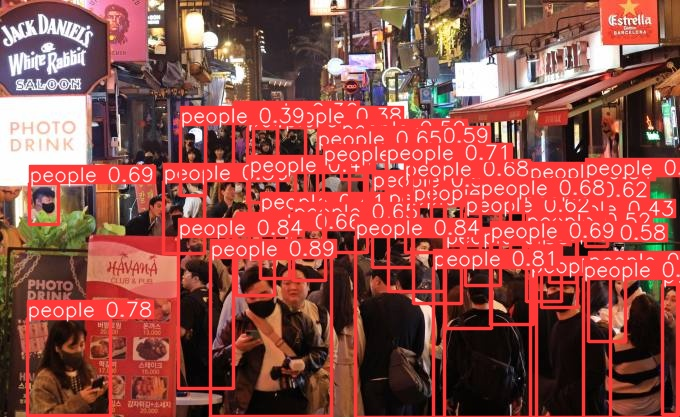

In [21]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/TEST.jpg', width=800)

### [추론(Inference)] 동영상에서 Object Detection 수행

추론에 사용할 동영상 업로드

In [19]:
# 추론할 동영상 파일명, 확장자 확인
# ultra_workdir 디렉토리 폴더명 확인 (ex 1team)
!cd /content/yolov5;python detect.py --source /content/gdrive/MyDrive/repository/test_vidio.mp4 \
                            --weights /mydrive/ultra_workdir/6team/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir/6team/weights/best.pt'], source=/content/gdrive/MyDrive/repository/test_vidio.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-153-gff6a9ac Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/876) /content/gdrive/MyDrive/repository/test_vidio.mp4: 640x384 15 peoples, 44.7ms
video 1/1 (2/876) /content/gdrive/MyDrive/repository/test_vidio.mp4: 640x384 14 peoples, 21.7ms
video 1/1 (3/876) /content/gdriv

추론이 완료된 동영상 다운로드

In [22]:
# 추론할 동영상 파일명, 확장자 확인
# 파일명 변경해서 받으려면 !mv 명령어 활용

from google.colab import files
files.download('/content/data/output/run_image/TEST.jpg')

FileNotFoundError: ignored